# Курсовой проект
Трунов Антон М8О-304Б Тема 16.
## Численное решение нелинейных интегральных уравнений
## Introduction
An integral equation is an equation with an unknown function under the integral sign. In
a general case an integral equation is of the form
$$
\int_{a}^{b} K(x,s,u(s)) \,ds = f(x,u(x)), \quad a\leq x \leq b 
$$
where $x$ is an independent variable, $u(x)$ is an unknown function, $K(x,s,u)$ is a kernel of
the integral equation, $f(x,u)$ is a right-hand side, $s$ is a variable of integration.
# Метод квадратур
Данные уравнения, в качестве примеров будем использовать уравнения Вольтерры и Фредгольма, решаются по схеме, приведенной ниже:
$$
y(x_i) = f(x_i) + \sum_{j=0}^{n} A_j K(x_i,x_j,y(x_j))  \quad i = 0, 1,...,n\\
\begin{cases}
y(x_0) = f(x_0) \\
y(x_i)  = f(x_i) + \sum_{j=0}^{i}A_{ij} K(x_i,x_j,y(x_j)) \quad i = 1, 2, ..., n 
\end{cases}
$$
В качетсве примера используем нелинейное уравнение Вольтерра 2 рода, имеющий вид:
$$
y(x)-\int_{a}^{x} K(x,s,y(s)) \,ds = f(x)
$$
Отметим, что ядро $K(x, s, y(s))$ интегрального уравнения зависит от
искомой функции $y(x)$. Предположим, что ядро и правая часть этого уравнения таковы, что его решение существует и единственно в
классе непрерывных на отрезке $[a, b]$ функций. Построим метод приближенного решения уравнения (1), основанный на аппроксимации
интеграла с помощью квадратурной формулы.
$\\$
Пусть на отрезке $[a, b]$ задана сетка с узлами $x_i, i = 1, 2, ..., n.$
Зафиксируем в уравнении (1) значения переменной x в узлах сетки.
Получим следующие равенства:
$$
y(x_i)-\int_{a}^{x_i} K(x_i,s,y(s)) \,ds = f(x_i), \quad i = 1, 2, ..., n 
$$
Заменим интегралы в этих равенствах конечными суммами. Получим
систему нелинейных рекуррентных соотношений:
$$
y_i-\sum_{j=1}^{i}A_j K_{ij}(y_j)  = f_i, \quad i = 1, 2, ..., n 
$$
Здесь $Aj$ — веса квадратурной формулы,$ f_i = f(x_i), y_i = \tilde{y}(x_i), \tilde{y}$ —
приближение к искомой функции $y, K_{ij}(y_j) = K(x_i, x_j, \tilde{y}(x_j ))$. Соотношения (3) позволяют находить значения $y_1, y_2, . . . , y_n$ приближенного решения в узлах сетки путем последовательного решения $n$
нелинейных уравнений:
$$
y_i-A_iK_{ii}=f_i+\sum_{j=1}^{i-1}A_j K_{ij}(y_j)  = f_i, \quad i =  2,3, ..., n 
$$
## Пример 1

$$
y(x)-\int_{0}^{x} e^{-(x-s)}y^2(s) \,ds = e^{-x} 
$$
Точное решение:
$$
y = 1
$$
Уравнение принимает следующий вид:
$$
y(x_i)-\int_{0}^{x_i} e^{-(x_i-s)}y^2(s) \,ds = e^{-x_i} \quad i = 1, 2, ..., n 
$$
Пусть узлы $x_i$ образуют на отрезке $[a, b]$ равномерную сетку с шагом $h$. Заменим интегралы в конечными суммами с помощью формулы трапеций. Получим следующую систему расчетных соотношений:
$$
y_1 = f_1, \quad y_i-\frac{h}{2}K_{ii}y_i^2=f_i+\sum_{j=1}^{i-1}h K_{ij} y_j^2, \quad i = 2, 3, ..., n 
$$
Заметим, что в данном случае $K_{ii} = 1$. Обозначим
$$
c_i = f_i+\sum_{j=1}^{i-1}h K_{ij} y_j^2, \quad i = 2, 3, ..., n 
$$
Для вычисления значений $y_i$, начиная со второго, получим квадратные уравнения:
$$
\frac{h}{2}y_i^2-y_i+c_i = 0,\quad i = 2, 3, ..., n 
$$
Тогда
$$
y_1=f_1, \quad y_i = \frac{1-\sqrt{1-2hc_i}}{h},\quad i = 2, 3, ..., n 
$$

In [73]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [120]:
K = lambda x, s: np.exp(s-x) #ядро
f = lambda x: np.exp(-x) #правая часть
y_sol = lambda x: 1 + x*0 #решение
a = 0
b = 1
h = 0.05

In [121]:
def quad_trapezoid(a,b,h,K,f):
    N = int((b - a)/h)
    x = np.linspace(a,b, N+1)
    y = np.empty_like(x)
    y[0] = f(x[0])
    K_ii = K(x[0],x[0])
    for i in range(1,N+1):
        c_i = f(x[i]) + sum(h*K(x[i],x[j])*y[j]*y[j] for j in range(0,i))
        y[i] = (1 - np.sqrt(1-2*h*K_ii*c_i)) / (h*K_ii)
    return x, y

In [122]:
def runge_romberg(method,p,h):
    x_h, y_h = method(a,b,h,K,f)
    x_2h, y_2h = method(a,b,2*h,K,f)
    N = len(x_2h)
    R = max(abs((y_h[2*i] - y_2h[i])) / (2**p - 1) for i in range(N))
    print("Error via Runge-Romberg = ",R)

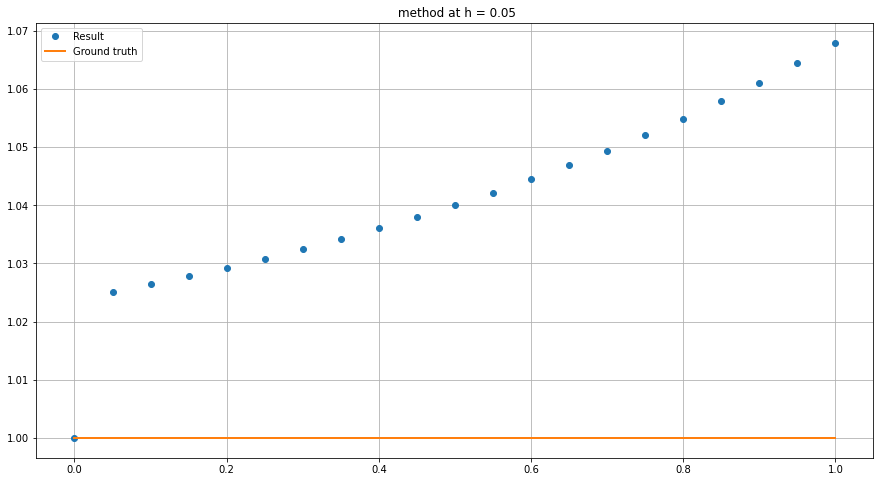

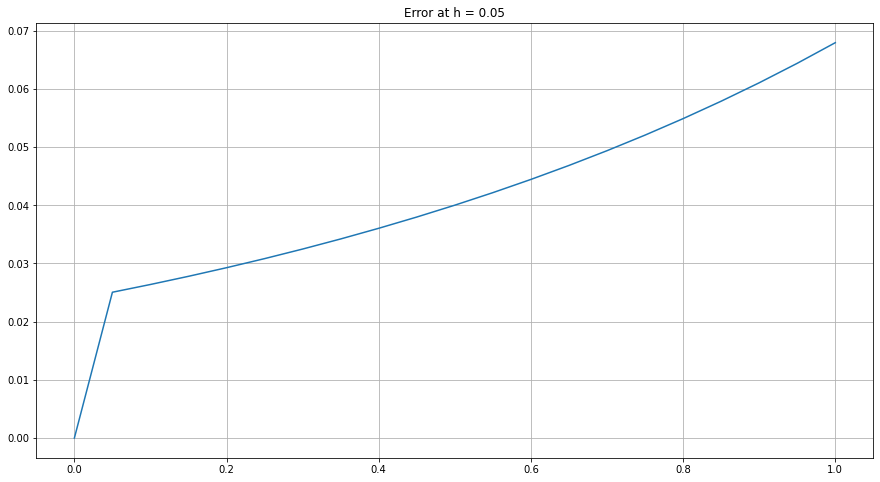

Error =  0.06794888198475268
Error via Runge-Romberg =  0.022846864757579317


In [123]:
x, y = quad_trapezoid(a,b,h,K,f)
plt.plot(x, y, 'o', label='Result')
plt.plot(x, y_sol(x), '-', lw=2, label='Ground truth')
plt.legend(loc='best')
plt.grid(True)
plt.title(' method at h = %s' %(h))
plt.show()
    
plt.grid(True)
plt.title('Error at h = %s' %h)
plt.plot(x,abs(y - y_sol(x)), '-')
plt.show()
print("Error = ",max(abs(y - y_sol(x))))

runge_romberg(quad_trapezoid,2,h)

## Пример 2
$$
y(x)-\int_{0}^{x} y^2(s) \,ds = \sin{x} - \frac{x}{2} + \frac{\sin{2x}}{4}
$$
Точное решение:
$$
y = \sin{x}
$$

In [114]:
K=  lambda x, s: 1 + x*s*0 #ядро
f = lambda x: np.sin(x) - x/2 + np.sin(2*x)/4 #правая часть
y_sol = lambda x: np.sin(x) #решение
a = 0
b = np.pi/2
h = np.pi/2 / 14

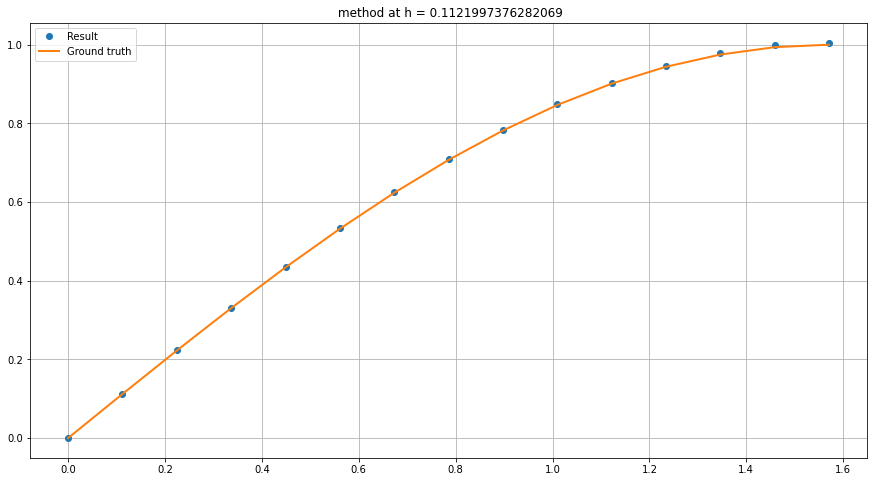

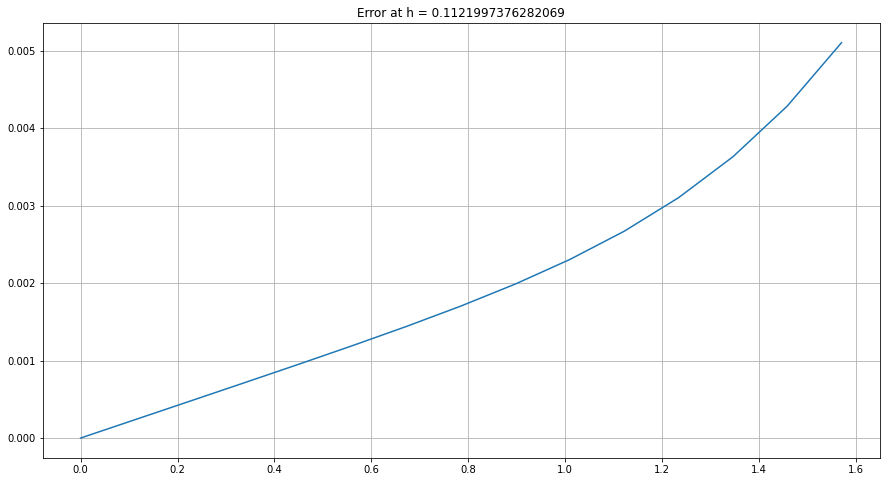

Error =  0.005103604601522482
Error via Runge-Romberg =  0.005460017799608104


In [115]:
x, y = quad_trapezoid(a,b,h,K,f)
plt.plot(x, y, 'o', label='Result')
plt.plot(x, y_sol(x), '-', lw=2, label='Ground truth')
plt.legend(loc='best')
plt.grid(True)
plt.title(' method at h = %s' %(h))
plt.show()
    
plt.grid(True)
plt.title('Error at h = %s' %h)
plt.plot(x,abs(y - y_sol(x)), '-')
plt.show()
print("Error = ",max(abs(y - y_sol(x))))

runge_romberg(quad_trapezoid,2,h)

# Newton–Kantorovich method
## Solving nonlinear Fredholm integral equations
The general form of nonlinear Fredholm integral equations of the Urysohn form is as follows:
$$
y(x)-\int_{a}^{b} K(x,s,y(s)) \,ds = f(x)
$$
We apply the Newton–Kantorovich method, for solving this kind of equation in the following:
$$
\begin{cases}
y_k(x) = y_{k-1}(x) + \phi_{k-1}(x) \\
\phi_{k-1}(x) = \epsilon_{k-1}(x) + \int_{a}^{b}K_y^{'}(x,s,y_{k-1}(s)) \phi_{k-1}(s) \,ds \\
\epsilon_{k-1}(x) = f(x) - y_{k-1}(x) +\int_{a}^{b} K(x,s,y_{k-1}(s)) \,ds
\end{cases}
$$
We have
$$
\phi_{k-1}(x) = f(x) - y_{k-1}(x) +\int_{a}^{b} K(x,s,y_{k-1}(s)) \,ds + \int_{a}^{b}K_y^{'}(x,s,y_{k-1}(s)) \phi_{k-1}(s) \,ds 
$$
Now, we approximate the two integrals on the right-hand side of by one of the numerical integration formulas such as repeated Simpson, repeated trapezoid or Gauss methods, so we get
$$
\phi_{k-1}(x) = f(x) - y_{k-1}(x) +\sum_{j=0}^{n} A_{j}K(x,x_j,y_{k-1}(x_j))  + \sum_{j=0}^{n} A_j K_y^{'}(x,x_j,y_{k-1}(x_j)) \phi_{k-1}(x_j) 
$$
By substituting $x=x_i$  for $i=0,1,...,n$, we obtain the following system:
$$
\phi_{k-1}(x_i) = f(x_i) - y_{k-1}(x_i) +\sum_{j=0}^{n} A_{j}K(x_i,x_j,y_{k-1}(x_j))  + \sum_{j=0}^{n}A_j K_y^{'}(x_i,x_j,y_{k-1}(x_j)) \phi_{k-1}(x_j)  
$$
Since $y_k(x) - y_{k-1}(x) = \phi_{k-1}(x)$, we have
$$
y_k(x_i) - y_{k-1}(x_i) = f(x_i) - y_{k-1}(x_i) +\sum_{j=0}^{n} A_{j}K(x_i,x_j,y_{k-1}(x_j))  + \sum_{j=0}^{n}A_j K_y^{'}(x_i,x_j,y_{k-1}(x_j)) [y_k(x_j) - y_{k-1}(x_j)] 
$$
Therefore, we get
$$
y_k(x_i) = f(x_i)  +\sum_{j=0}^{n} A_{j}K(x_i,x_j,y_{k-1}(x_j))  + \sum_{j=0}^{n}A_j K_y^{'}(x_i,x_j,y_{k-1}(x_j)) [y_k(x_j) - y_{k-1}(x_j)] 
$$
Now, we let
$$
(F^{(k-1)})_{i+1} = f(x_i) + \sum_{j=0}^{n} A_{j} [K(x_i,x_j,y_{k-1}(x_j)) - K_y^{'}(x_i,x_j,y_{k-1}(x_j))y_{k-1}(x_j)] \\
(A^{(k-1)})_{i+1,j+1} = A_j K_y^{'}(x_i,x_j,y_{k-1}(x_j)) \\
(Y^{(k)})_{i+1} = y_k(x_i)
$$
to obtain the following sequence of linear systems. Thus, by solving the following systems (2.11) we are able to solve this kind of equation:
$$
(I-A^{k-1})Y^k = F^{(k-1)}, \quad k = 1,2,3,...
$$
For this purpose, we first consider an initial solution $(Y^{(0)})_{i} = y_0(x_i)$

## Пример 3
$$
y(x) = \sin{\pi x} + \frac{1}{5} \int_{0}^1 \cos{(\pi x)} \sin{(\pi s)} y^3(s) \,ds
$$
Точное решение:
$$
y(x) = \sin{\pi x} + \frac{1}{3} (20-\sqrt{391}) \cos{\pi x}
$$

In [104]:
K=  lambda x, s, y: np.cos(np.pi*x) * np.sin(np.pi*s) * y**3 / 5 #ядро
K_y =  lambda x, s, y: np.cos(np.pi*x)*np.sin(np.pi*s)* y*y * 3 / 5 #ядро производная
f = lambda x: np.sin(np.pi*x)  #правая часть
y_sol = lambda x: np.sin(np.pi*x) + np.cos(np.pi*x)*(20 - np.sqrt(391)) / 3 #решение
a = 0
b = 1
h = 0.05
m = 2

In [105]:
def runge_romberg2(method,p,h): # m > 1
    x_h, y_h = method(K,K_y,f,a,b,h,m)
    x_2h, y_2h = method(K,K_y,f,a,b,2*h,m)
    N = len(x_2h)
    R = max(abs((y_h[2*i] - y_2h[i])) / (2**p - 1) for i in range(N))
    print("Error via Runge-Romberg = ",R)

In [106]:
def newton_fred(K,K_y,f,a,b,h,m):
    k = 0
    N = int((b - a)/h)
    x = np.linspace(a,b, N+1)
    I = np.eye(N+1)
    Y = np.ones_like(x) # initial solution
    F = np.empty_like(Y)
    A = np.empty((N+1,N+1))
    while k < m: 
        for i in range(N+1):
            F[i] = f(x[i]) + sum(h*(K(x[i],x[j],Y[j]) - K_y(x[i],x[j],Y[j])*Y[j]) for j in range(1,N)) + h/2*(K(x[i],x[0],Y[0])+K(x[i],x[N],Y[N])- K_y(x[i],x[0],Y[0])*Y[0]- K_y(x[i],x[N],Y[N])*Y[N])
        for i in range(N+1):
            A[i,0] = K_y(x[i],x[0],Y[0])*h/2
            A[i,N] = K_y(x[i],x[N],Y[N])*h/2
            for j in range(1,N):
                A[i,j] = K_y(x[i],x[j],Y[j])*h
        Y = np.linalg.solve(I-A,F)
        k += 1
    return x, Y                                                                                                          

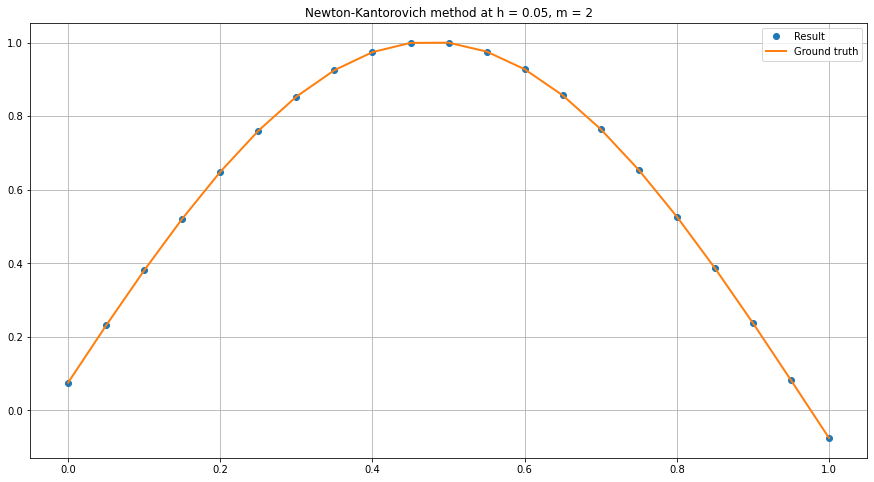

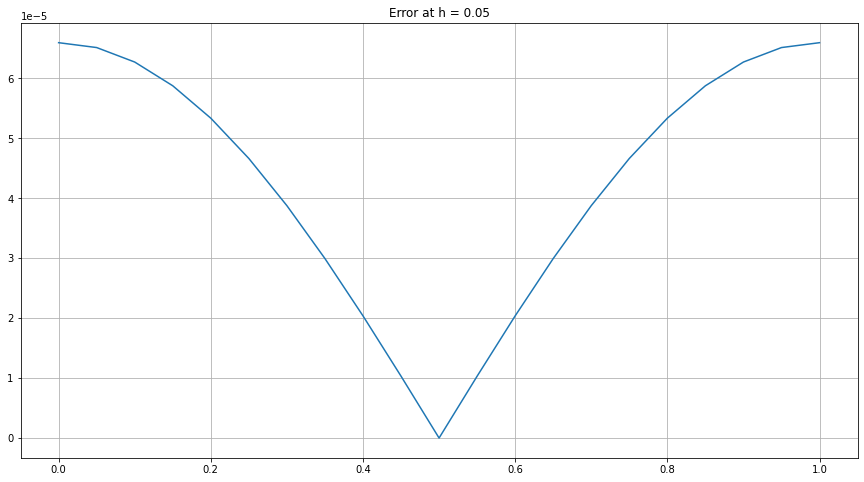

Error =  6.594747096844156e-05
Error via Runge-Romberg =  2.2747579132379827e-06


In [107]:
x, y = newton_fred(K,K_y,f,a,b,h,m)
plt.plot(x, y, 'o', label='Result')
plt.plot(x, y_sol(x), '-', lw=2, label='Ground truth')
plt.legend(loc='best')
plt.grid(True)
plt.title('Newton-Kantorovich method at h = %s, m = %s' %(h,m))
plt.show()
    
plt.grid(True)
plt.title('Error at h = %s' %h)
plt.plot(x,abs(y - y_sol(x)), '-')
plt.show()
print("Error = ",max(abs(y - y_sol(x))))

runge_romberg2(newton_fred,2,h)

## Solving nonlinear Volterra integral equations
The general form of nonlinear Fredholm integral equations of the Urysohn form is as follows:
$$
y(x)-\int_{a}^{x} K(x,s,y(s)) \,ds = f(x)
$$
We apply the Newton–Kantorovich method, for solving this kind of equation in the following:
$$
\begin{cases}
y_k(x) = y_{k-1}(x) + \phi_{k-1}(x) \\
\phi_{k-1}(x) = \epsilon_{k-1}(x) + \int_{a}^{x}K_y^{'}(x,s,y_{k-1}(s)) \phi_{k-1}(s) \,ds \\
\epsilon_{k-1}(x) = f(x) - y_{k-1}(x) +\int_{a}^{x} K(x,s,y_{k-1}(s)) \,ds
\end{cases}
$$
We have
$$
\phi_{k-1}(x) = f(x) - y_{k-1}(x) +\int_{a}^{x} K(x,s,y_{k-1}(s)) \,ds + \int_{a}^{x} K_y^{'}(x,s,y_{k-1}(s)) \phi_{k-1}(s) \,ds 
$$
By substituting $x=x_i$  for $i=0,1,...,n$, we obtain the following system:
$$
\begin{cases}
\phi_{k-1}(x_0) = f(x_0) - y_{k-1}(x_0) \\
\phi_{k-1}(x_i) = f(x_i) - y_{k-1}(x_i) +\sum_{j=0}^{i} A_{ij}K(x_i,x_j,y_{k-1}(x_j))  + \sum_{j=0}^{i}A_{ij} K_y^{'}(x_i,x_j,y_{k-1}(x_j)) \phi_{k-1}(x_j), \quad i = 1,2,...,n
\end{cases}
$$
Since $y_k(x) - y_{k-1}(x) = \phi_{k-1}(x)$, we have
$$
\begin{cases}
y_k(x_0) = f(x_0) \\
y_k(x_i) = f(x_i)  +\sum_{j=0}^{i} A_{ij}K(x_i,x_j,y_{k-1}(x_j))  + \sum_{j=0}^{i}A_{ij} K_y^{'}(x_i,x_j,y_{k-1}(x_j)) [y_k(x_j) - y_{k-1}(x_j)], \quad i=1,2,...,n
\end{cases}
$$
Now, we let

$$
(F^{(k-1)})_{i+1} = 
\begin{cases}
f(x_0) \quad i=0 \\
f(x_i) + \sum_{j=0}^{i} A_{ij} [K(x_i,x_j,y_{k-1}(x_j)) - K_y^{'}(x_i,x_j,y_{k-1}(x_j))y_{k-1}(x_j)] \quad i=1,2,...,n
\end{cases} 
$$

$$
(A^{(k-1)})_{i+1,j+1} = 
\begin{cases}
A_{ij} K_y^{'}(x_i,x_j,y_{k-1}(x_j)) \quad i = 1,2,...,n \quad j =0,1,...,i \\
0 \quad o.w.
\end{cases} 
$$

$$
(Y^{(k)})_{i+1} = y_k(x_i)
$$
to obtain the following sequence of linear systems. Thus, by solving the following systems (2.11) we are able to solve this kind of equation:
$$
(I-A^{k-1})Y^k = F^{(k-1)}, \quad k = 1,2,3,...
$$


## Example 4
$$
y(x) = \frac{3}{2} - \frac{e^{-2x}}{2} - \int_{0}^x (y^2(s)+y(s)) \,ds
$$
Точное решение:
$$
y(x) = e^{-x}
$$

In [101]:
K=  lambda x, s, y: 0*x*s - (y*y + y) #ядро
K_y =  lambda x, s, y: 0*x*s - (2*y + 1) #ядро производная
f = lambda x: 3/2 - np.exp(-2*x)/2  #правая часть
y_sol = lambda x: np.exp(-x) #решение
a = 0
b = 1
h = 0.1
m = 2

In [102]:
def newton_volt(K,K_y,f,a,b,h,m):
    k = 0
    N = int((b - a)/h)
    x = np.linspace(a,b, N+1)
    I = np.eye(N+1)
    Y = np.ones_like(x) # initial solution
    F = np.empty_like(Y)
    A = np.zeros((N+1,N+1))
    F[0] = f(x[0])
    while k < m:
        F[1] = f(x[1])  + h/2*(K(x[1],x[0],Y[0])+K(x[1],x[1],Y[1]) - K_y(x[1],x[0],Y[0])*Y[0]- K_y(x[1],x[1],Y[1])*Y[1])
        for i in range(2,N+1):
            F[i] = f(x[i]) + sum(h*(K(x[i],x[j],Y[j]) - K_y(x[i],x[j],Y[j])*Y[j]) for j in range(1,i)) + h/2*(K(x[i],x[0],Y[0])+K(x[i],x[i],Y[i])-K_y(x[1],x[0],Y[0])*Y[0]- K_y(x[1],x[i],Y[i])*Y[i])
        for i in range(1,N+1):
            A[i,0] = K_y(x[i],x[0],Y[0])*h/2
            A[i,i] = K_y(x[i],x[i],Y[i])*h/2
            for j in range(1,i):
                A[i,j] = K_y(x[i],x[j],Y[j])*h
        Y = np.linalg.solve(I-A,F)
        k += 1
    return x, Y 

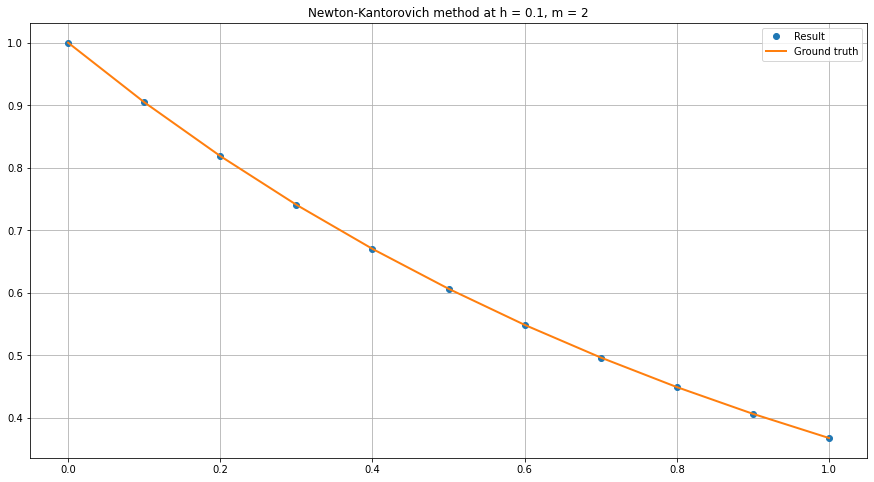

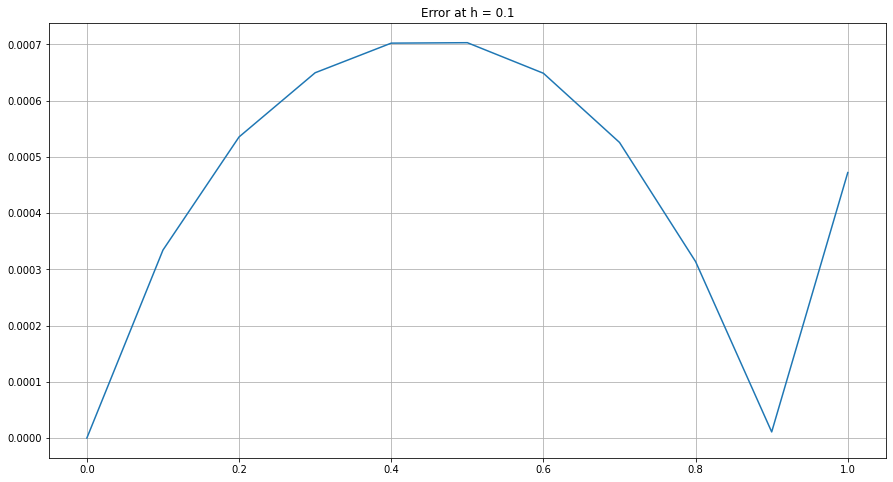

Error =  0.0007030090253438148
Error via Runge-Romberg =  0.0007482043126200155


In [103]:
x, y = newton_volt(K,K_y,f,a,b,h,m)
plt.plot(x, y, 'o', label='Result')
plt.plot(x, y_sol(x), '-', lw=2, label='Ground truth')
plt.legend(loc='best')
plt.grid(True)
plt.title('Newton-Kantorovich method at h = %s, m = %s' %(h,m))
plt.show()
    
plt.grid(True)
plt.title('Error at h = %s' %h)
plt.plot(x,abs(y - y_sol(x)), '-')
plt.show()
print("Error = ",max(abs(y - y_sol(x))))

runge_romberg2(newton_volt,2,h)